With a data loading function first.

Tensorflow.

Dense.


### Data Examination

In [1]:
# 'as' keyword
import tensorflow as tf

In [0]:
#shut up on warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [3]:
# libraries
# one hot encoding
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets('MNIST_data/', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

#ground truth, label, annotation
inp_batch, gt_batch = mnist_data.train.next_batch(10)
x, y = inp_batch[0] , gt_batch[0]

#check shapes
print(x.shape,y.shape)
print(inp_batch.shape,gt_batch.shape)




(784,) (10,)
(10, 784) (10, 10)


In [0]:
def imformat(x):
  horlen = int(math.sqrt(len(x)))
  verlen = horlen
  print('Horizontal length: {},\nVertical Length: {} \n'.format(verlen,horlen))
  x_imformat = x.reshape((horlen,verlen))
  return x_imformat

In [6]:
#reformat
x_imformat = imformat(x)
print(x_imformat.shape,y.shape)

Horizontal length: 28,
Vertical Length: 28 

(28, 28) (10,)


One hot representation of the label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


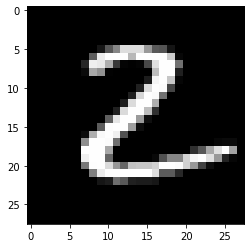

In [7]:
#check on plot
plt.imshow(x_imformat, cmap = 'gray')
print('One hot representation of the label: {}'.format(y))

In [8]:
#check if normalized
print(x.max(),x.min())
print(np.amax(x),np.amin(x))

1.0 0.0
1.0 0.0


### Network

In [0]:
#network hyperparameters

batch_num = 50
input_shape = 784
label_shape = 10

lr = 0.003
layer_1_neurons = 200
layer_2_neurons = 80
layer_3_neurons = 10

epochs = 100


In [0]:
#input - output placeholders

inp = tf.placeholder(dtype=tf.float32,shape=(None, input_shape))
lab = tf.placeholder(dtype=tf.float32,shape=(None, label_shape))

In [0]:
#network parameters

W1 = tf.Variable(tf.random_normal(shape = [input_shape,layer_1_neurons]))
b1 = tf.Variable(tf.random_normal(shape = [layer_1_neurons]))

W2 = tf.Variable(tf.random_normal(shape = [layer_1_neurons,layer_2_neurons]))
b2 = tf.Variable(tf.random_normal(shape = [layer_2_neurons]))

W3 = tf.Variable(tf.random_normal(shape = [layer_2_neurons,layer_3_neurons]))
b3 = tf.Variable(tf.random_normal(shape = [layer_3_neurons]))

In [0]:
#computation graph

y1 = tf.nn.sigmoid(tf.matmul(inp,W1) + b1)
y2 = tf.nn.sigmoid(tf.matmul(y1,W2)+ b2)
y3 = tf.nn.softmax(tf.matmul(y2,W3)+ b3)
pred = y3

#loss = tf.reduce_mean(-tf.reduce_sum(pred * tf.log(lab), reduction_indices=[1]))
loss = tf.nn.softmax_cross_entropy_with_logits_v2(lab,pred)

tstep = tf.train.AdamOptimizer(lr).minimize(loss)






In [0]:
#sess.close()

In [0]:
sess = tf.InteractiveSession()

tf.global_variables_initializer().run()

In [15]:
itnum = 1000
epnum = 25

for epoch in range(epnum):
  aggloss = 0
  for itr in range(1,itnum):
    xbatch,ybatch = mnist_data.train.next_batch(batch_num)
    itrloss, _ = sess.run([loss,tstep], feed_dict = {inp:xbatch, lab:ybatch})
    aggloss = aggloss + np.mean(itrloss)
      
  print(epoch,aggloss/itnum)  

0 1.8741532694101333
1 1.7575258275270462
2 1.611021981358528
3 1.5987113435268403
4 1.5913970787525178
5 1.5839023480415344
6 1.582601956486702
7 1.5783557376861572
8 1.5758775432109833
9 1.5752411094903946
10 1.543380089879036
11 1.4906213421821595
12 1.4859960514307022
13 1.4835927107334137
14 1.4808786276578902
15 1.4796762506961822
16 1.4781983535289764
17 1.4779095847606658
18 1.4768491719961165
19 1.4754931987524034
20 1.4740170260667802
21 1.476179505109787
22 1.4737211062908173
23 1.4750904276371002
24 1.4721358108520508


In [18]:
acc = 0
sample_size = 5000
for _ in range(sample_size):
  xtest,ytest = mnist_data.test.next_batch(1)  
  testpred = sess.run([pred], feed_dict = {inp:xtest, lab:ybatch})
  acc = acc + int(np.argmax(ytest)==np.argmax(testpred))
  
acc = acc/sample_size
print(acc)


0.9704
